## Import packages

In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for applying statistical analysis
import scipy.stats as stats

# for applying calculations such as .summary()
# for stats models only 
import statsmodels.formula.api as  smf
 
# import Linear Regression Model
from sklearn.linear_model import LinearRegression

# for importing mae, mape, mse
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# for using train-test split
from sklearn.model_selection import train_test_split

# for bi-variate analysis
from sklearn.feature_selection import f_regression

# for checking Multi-colinearity between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

## Import Dataset

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


## Explainatory Data Analysis (EDA)
        - categorical vs continuous
        - Detection of Missing values
        - Detection of Outliers
        - Detection of duplicates

#### Detection of missing values

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

 ##### There are no missing values found in this dataset.

#### Segregating the data based on qualitative and quantitative data

In [5]:
housing_qual = housing.select_dtypes('object')
housing_quan = housing.select_dtypes(['int64','float64'])

In [6]:
housing_qual

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical
...,...,...,...,...
2408,OneFam,SLvl,Above_Average,Typical
2409,OneFam,One_Story,Average,Typical
2410,OneFam,SFoyer,Average,Typical
2411,OneFam,One_Story,Average,Typical


In [7]:
housing_quan.head()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1960,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,1961,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,1958,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,1968,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,1997,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


In [8]:
ordinal_var = housing_qual[['Overall_Cond','Exter_Cond']]
nominal_var = housing_qual[['Bldg_Type', 'House_Style']]

In [9]:
ordinal_var

,Overall_Cond,Exter_Cond
0,Average,Typical
1,Above_Average,Typical
2,Above_Average,Typical
3,Average,Typical
4,Average,Typical
...,...,...
2408,Above_Average,Typical
2409,Average,Typical
2410,Average,Typical
2411,Average,Typical


In [10]:
nominal_var

,Bldg_Type,House_Style
0,OneFam,One_Story
1,OneFam,One_Story
2,OneFam,One_Story
3,OneFam,One_Story
4,OneFam,Two_Story
...,...,...
2408,OneFam,SLvl
2409,OneFam,One_Story
2410,OneFam,SFoyer
2411,OneFam,One_Story


In [11]:
housing_disc = housing_quan[['Year_Built', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']]
housing_cont = housing_quan[['Lot_Frontage','Lot_Area', 'Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF','Longitude','Latitude','Sale_Price']]

#### Summary of the categorical data

In [12]:
housing_qual.describe().T

,count,unique,top,freq
Bldg_Type,2413,5,OneFam,2002
House_Style,2413,8,One_Story,1189
Overall_Cond,2413,9,Average,1282
Exter_Cond,2413,5,Typical,2081


#### Detection of Outliers

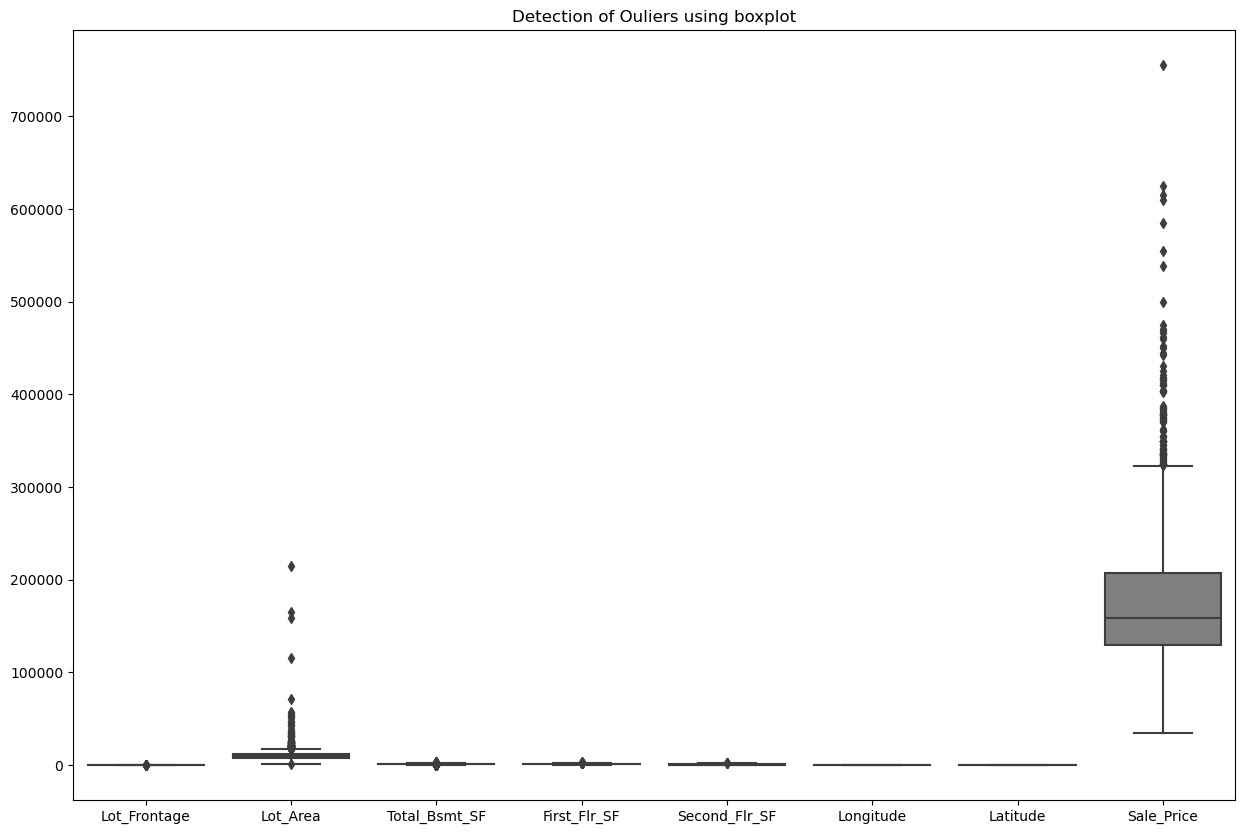

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=housing_cont)
plt.title('Detection of Ouliers using boxplot')
plt.show()

### Data Cleaning

#### 1. Treatment of outliers

In [14]:
housing_cont = housing_cont.apply(lambda x : x.clip(lower = x.quantile(0.01) , upper = x.quantile(0.99)))

#### Checking the outliers after treatment

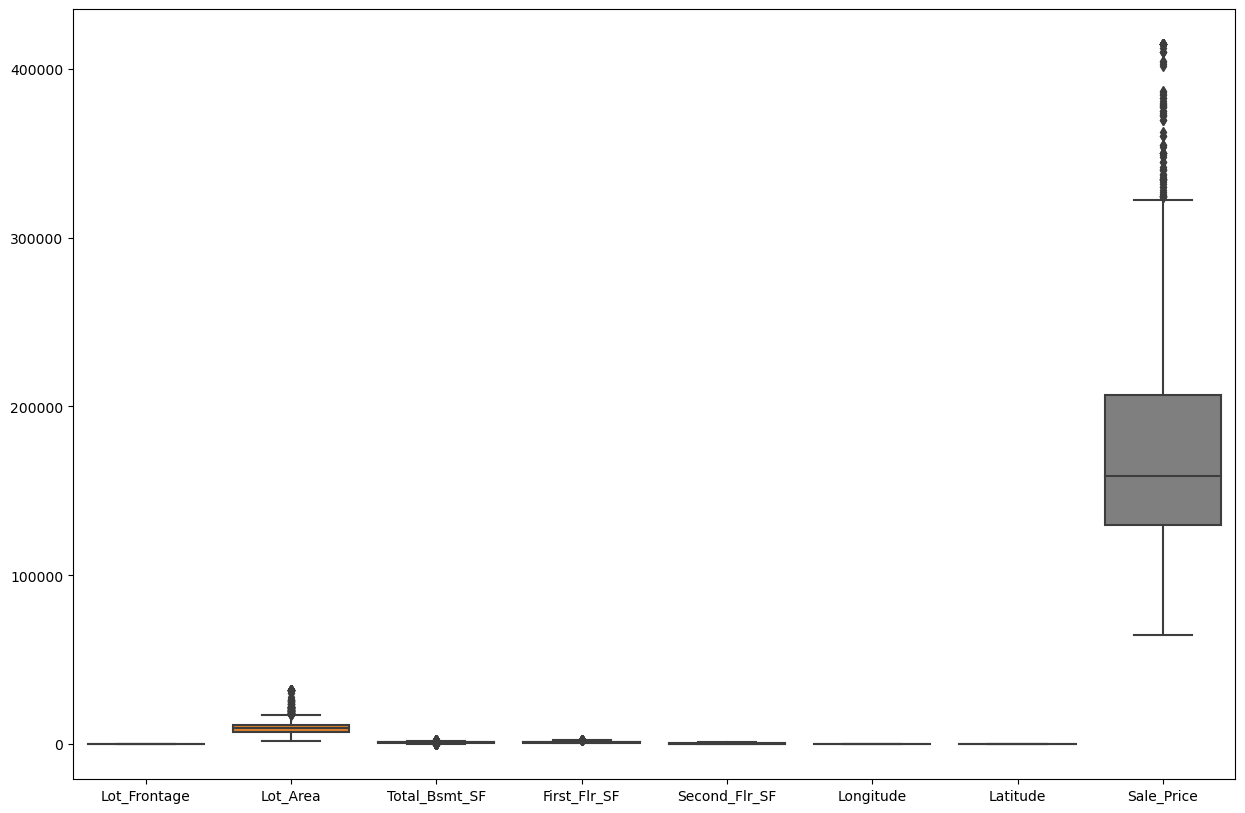

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=housing_cont)
plt.show()

### Assumptions of Linear Regression model
   There are many assumptions considered while working with Regression problems. Out of these 10 assumptions, 4 of them are:

        i. All the y & x variables must follow NORMAL DISTRIBUTION.
            If not all, atleast Y variable must follow normal distribution.
        ii. y variables should be linearly related to x variables, otherwise we will not get the best fit line.
        iii. No. of observations > No. of variables.
        iv. X should be independent variable/s.

#### Checking the distribution of y variable

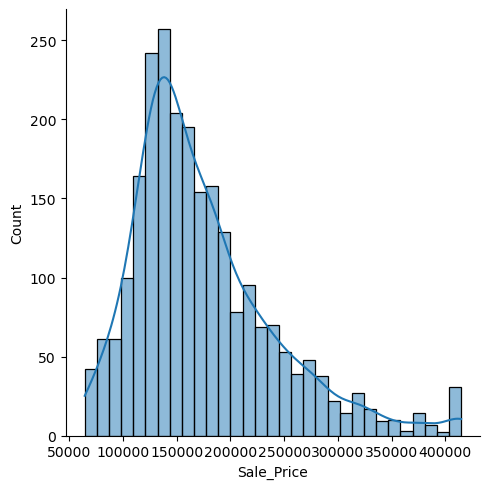

In [16]:
sns.displot(housing_cont.Sale_Price, kde = True)

* **Skewness of the data can be checked using .skew(). For the normally distributed data, the skewness should be 0.**

In [17]:
housing_cont.Sale_Price.skew()

1.2252789899833696

#### Transform the y variable i.e Sale Price

In [18]:
tran_Sales_Price = np.log(housing_cont.Sale_Price)

In [19]:
tran_Sales_Price

0       12.278393
1       11.561716
2       12.055250
3       12.404924
4       12.154253
          ...    
2408    11.867097
2409    11.782953
2410    11.790557
2411    12.043554
2412    12.144197
Name: Sale_Price, Length: 2413, dtype: float64

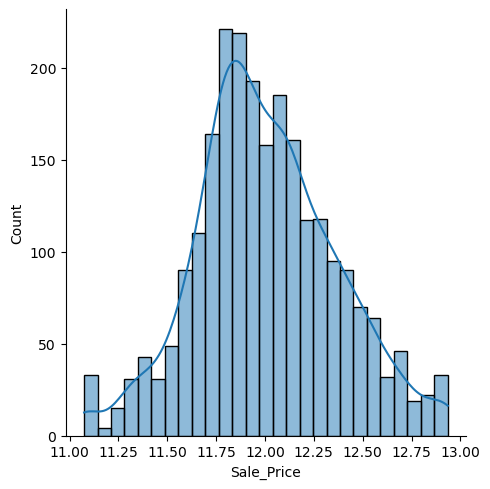

In [20]:
sns.displot(tran_Sales_Price, kde = True)

In [21]:
tran_Sales_Price.skew()

0.1609058156798862

### Handling Categorical variables

In [22]:
housing_qual.head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical


#### Creating dummy variables 

In [23]:
housing_qual = pd.get_dummies(housing_qual.loc[:,['Bldg_Type','House_Style','Overall_Cond','Exter_Cond']],
                              drop_first= True)

In [24]:
housing_qual

,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,House_Style_One_and_Half_Fin,House_Style_One_and_Half_Unf,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,...,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2409,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2410,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2411,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
housing_qual.columns

Index(['Bldg_Type_OneFam', 'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE',
       'Bldg_Type_TwoFmCon', 'House_Style_One_and_Half_Fin',
       'House_Style_One_and_Half_Unf', 'House_Style_SFoyer',
       'House_Style_SLvl', 'House_Style_Two_Story',
       'House_Style_Two_and_Half_Fin', 'House_Style_Two_and_Half_Unf',
       'Overall_Cond_Average', 'Overall_Cond_Below_Average',
       'Overall_Cond_Excellent', 'Overall_Cond_Fair', 'Overall_Cond_Good',
       'Overall_Cond_Poor', 'Overall_Cond_Very_Good', 'Overall_Cond_Very_Poor',
       'Exter_Cond_Fair', 'Exter_Cond_Good', 'Exter_Cond_Poor',
       'Exter_Cond_Typical'],
      dtype='object')

### Data Combining

In [26]:
housing_new = pd.concat([housing_cont,housing_disc,housing_qual], axis=1)

In [27]:
housing_new

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical
0,129.88,31707.6,1080.0,1656.0,0.0,-93.619754,42.054035,215000.0,1960,1,...,0,0,0,0,0,0,0,0,0,1
1,80.00,11622.0,882.0,896.0,0.0,-93.619756,42.053014,105000.0,1961,1,...,0,0,0,0,0,0,0,0,0,1
2,81.00,14267.0,1329.0,1329.0,0.0,-93.619387,42.052659,172000.0,1958,1,...,0,0,0,0,0,0,0,0,0,1
3,93.00,11160.0,2110.0,2110.0,0.0,-93.617320,42.051245,244000.0,1968,2,...,0,0,0,0,0,0,0,0,0,1
4,74.00,13830.0,928.0,928.0,701.0,-93.638933,42.060899,189900.0,1997,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37.00,7937.0,1003.0,1003.0,0.0,-93.604776,41.988964,142500.0,1984,1,...,0,0,0,0,0,0,0,0,0,1
2409,0.00,8885.0,864.0,902.0,0.0,-93.602680,41.988939,131000.0,1983,1,...,0,0,0,0,0,0,0,0,0,1
2410,62.00,10441.0,912.0,970.0,0.0,-93.606847,41.988939,132000.0,1992,1,...,0,0,0,0,0,0,0,0,0,1
2411,77.00,10010.0,1389.0,1389.0,0.0,-93.601509,41.990921,170000.0,1974,1,...,0,0,0,0,0,0,0,0,0,1


### Creating the new transformed independent variable

In [28]:
housing_new['ln_Sale_Price'] = np.log(housing_new.Sale_Price)

In [29]:
housing_new.head()

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical,ln_Sale_Price
0,129.88,31707.6,1080.0,1656.0,0.0,-93.619754,42.054035,215000.0,1960,1,...,0,0,0,0,0,0,0,0,1,12.278393
1,80.00,11622.0,882.0,896.0,0.0,-93.619756,42.053014,105000.0,1961,1,...,0,0,0,0,0,0,0,0,1,11.561716
2,81.00,14267.0,1329.0,1329.0,0.0,-93.619387,42.052659,172000.0,1958,1,...,0,0,0,0,0,0,0,0,1,12.055250
3,93.00,11160.0,2110.0,2110.0,0.0,-93.617320,42.051245,244000.0,1968,2,...,0,0,0,0,0,0,0,0,1,12.404924
4,74.00,13830.0,928.0,928.0,701.0,-93.638933,42.060899,189900.0,1997,2,...,0,0,0,0,0,0,0,0,1,12.154253


#### Checking the correlations between multiple variables.

In [30]:
Correlation = housing.corr()
Correlation

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
Lot_Frontage,1.000000,0.111752,-0.032577,0.139344,0.196271,-0.020051,0.046891,-0.044356,0.107344,0.020522,0.029240,-0.002233,0.026206,0.160398
Lot_Area,0.111752,1.000000,0.006124,0.208979,0.305419,0.015046,0.119138,0.010567,0.138169,-0.013489,0.238730,-0.098893,-0.051481,0.275066
Year_Built,-0.032577,0.006124,1.000000,0.384244,0.273809,0.019209,0.441418,0.274389,-0.042448,-0.137998,0.159663,-0.424697,0.212627,0.533158
Total_Bsmt_SF,0.139344,0.208979,0.384244,1.000000,0.766565,-0.215670,0.316821,-0.087898,0.090679,-0.028391,0.313337,-0.153146,0.164925,0.642354
First_Flr_SF,0.196271,0.305419,0.273809,0.766565,1.000000,-0.265052,0.366844,-0.136403,0.137210,0.076361,0.400392,-0.115597,0.125977,0.634672
Second_Flr_SF,-0.020051,0.015046,0.019209,-0.215670,-0.265052,1.000000,0.420907,0.626065,0.510590,0.083579,0.175173,-0.058138,0.087136,0.293338
Full_Bath,0.046891,0.119138,0.441418,0.316821,0.366844,0.420907,1.000000,0.176045,0.382962,0.196142,0.244596,-0.225956,0.186127,0.548635
Half_Bath,-0.044356,0.010567,0.274389,-0.087898,-0.136403,0.626065,0.176045,1.000000,0.270618,-0.044196,0.187236,-0.113804,0.154415,0.292314
Bedroom_AbvGr,0.107344,0.138169,-0.042448,0.090679,0.137210,0.510590,0.382962,0.270618,1.000000,0.241605,0.097119,-0.034338,0.023603,0.183634
Kitchen_AbvGr,0.020522,-0.013489,-0.137998,-0.028391,0.076361,0.083579,0.196142,-0.044196,0.241605,1.000000,-0.109825,0.079593,-0.049201,-0.114394


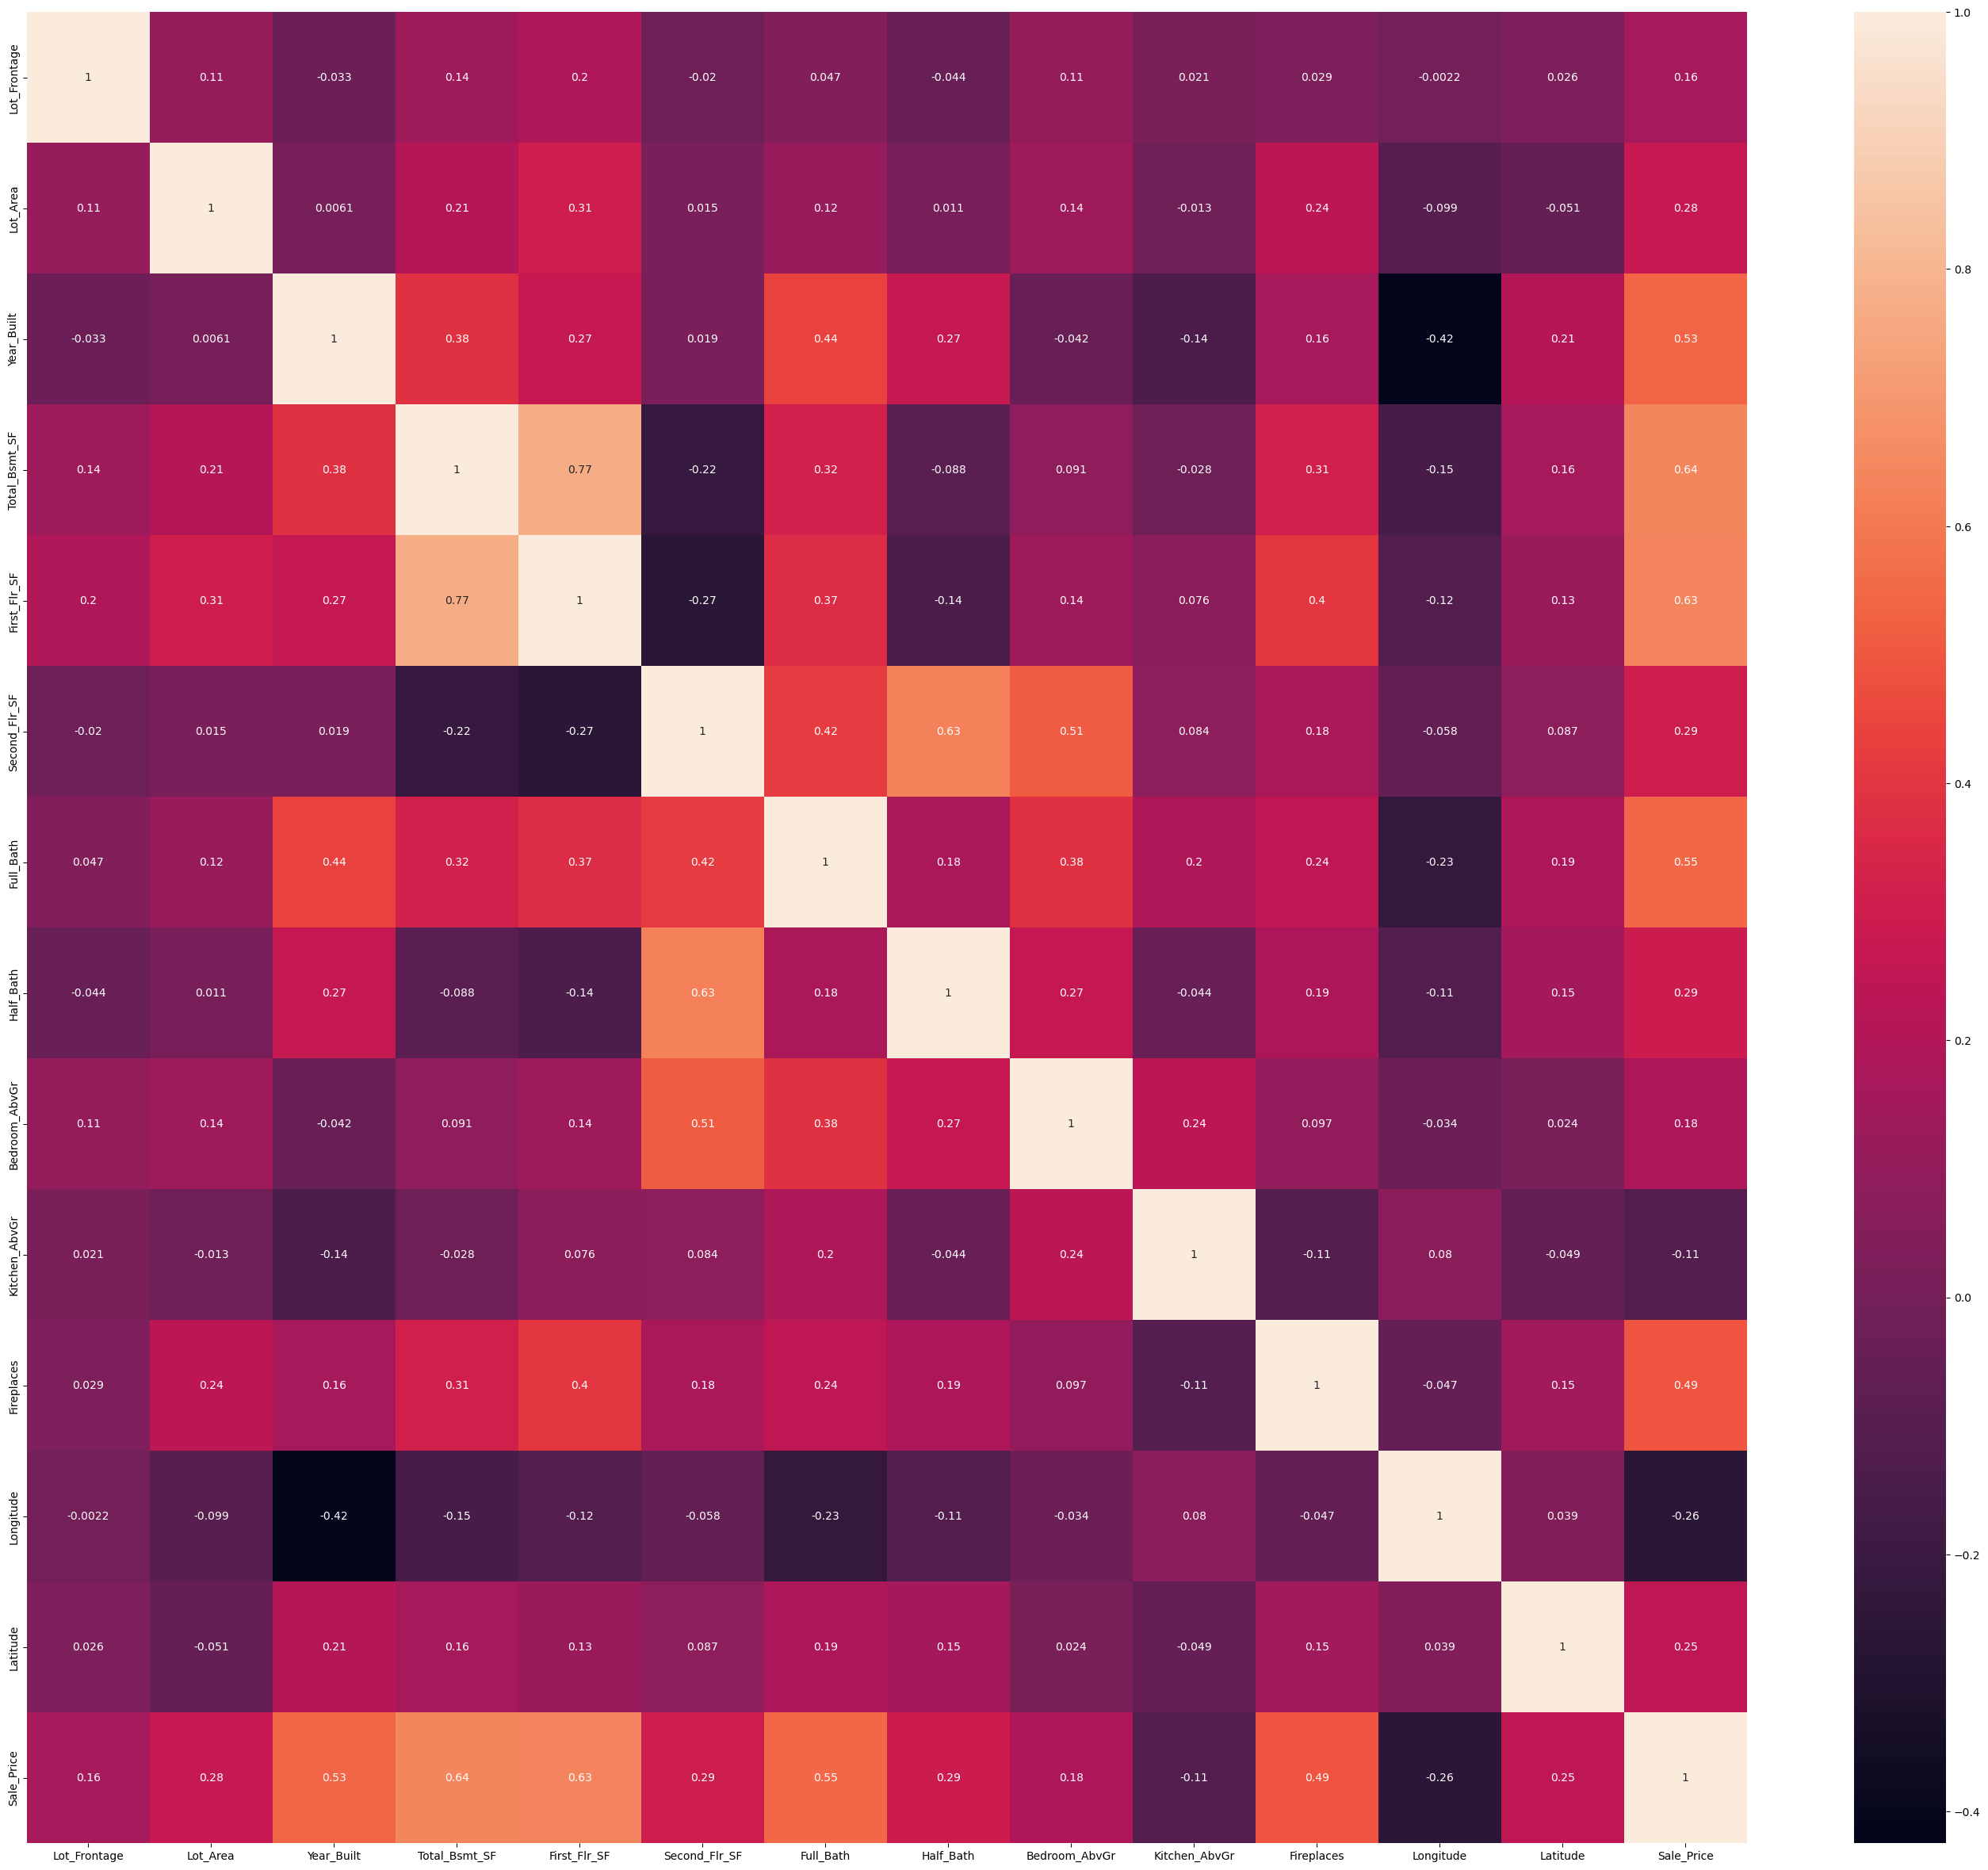

In [31]:
plt.figure(figsize = (35,30))
sns.heatmap(Correlation, annot = True)
plt.show()

### Data Modelling steps

#### 1. Train-Test Split


In [32]:
indepent_var = housing_new.columns.difference(['Sale_Price','ln_Sale_Price'])
indepent_var

Index(['Bedroom_AbvGr', 'Bldg_Type_OneFam', 'Bldg_Type_Twnhs',
       'Bldg_Type_TwnhsE', 'Bldg_Type_TwoFmCon', 'Exter_Cond_Fair',
       'Exter_Cond_Good', 'Exter_Cond_Poor', 'Exter_Cond_Typical',
       'Fireplaces', 'First_Flr_SF', 'Full_Bath', 'Half_Bath',
       'House_Style_One_and_Half_Fin', 'House_Style_One_and_Half_Unf',
       'House_Style_SFoyer', 'House_Style_SLvl', 'House_Style_Two_Story',
       'House_Style_Two_and_Half_Fin', 'House_Style_Two_and_Half_Unf',
       'Kitchen_AbvGr', 'Latitude', 'Longitude', 'Lot_Area', 'Lot_Frontage',
       'Overall_Cond_Average', 'Overall_Cond_Below_Average',
       'Overall_Cond_Excellent', 'Overall_Cond_Fair', 'Overall_Cond_Good',
       'Overall_Cond_Poor', 'Overall_Cond_Very_Good', 'Overall_Cond_Very_Poor',
       'Second_Flr_SF', 'Total_Bsmt_SF', 'Year_Built'],
      dtype='object')

In [33]:
np.random.seed(22220861)
train, test = train_test_split(housing_new, test_size= 0.2)

In [34]:
train

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical,ln_Sale_Price
590,80.0,9000.0,160.0,1142.0,0.0,-93.605520,42.038811,113500.0,1958,1,...,0,0,0,0,0,0,0,0,1,11.639558
235,75.0,9375.0,1040.0,1044.0,1054.0,-93.680864,42.018721,240000.0,1997,2,...,0,0,0,0,0,0,0,0,1,12.388394
1287,0.0,4426.0,848.0,848.0,0.0,-93.683127,42.015927,149300.0,2004,1,...,0,0,0,0,0,0,0,0,1,11.913713
2345,45.0,8248.0,686.0,686.0,564.0,-93.656753,42.022089,116000.0,1918,1,...,0,1,0,0,0,0,0,0,1,11.661345
1290,0.0,4438.0,848.0,848.0,0.0,-93.681401,42.016122,144500.0,2004,1,...,0,0,0,0,0,0,0,0,1,11.881035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.0,12936.0,723.0,735.0,660.0,-93.631519,42.047652,162000.0,1972,1,...,0,0,0,0,0,0,0,0,1,11.995352
458,65.0,8125.0,1092.0,1112.0,438.0,-93.642474,42.051420,241000.0,2006,2,...,0,0,0,0,0,0,0,0,1,12.392552
2324,37.0,4435.0,848.0,848.0,0.0,-93.683728,42.016252,155900.0,2004,1,...,0,0,0,0,0,0,0,0,1,11.956970
1529,50.0,8012.0,630.0,630.0,636.0,-93.686413,42.034569,128000.0,1980,1,...,0,0,0,0,0,0,0,0,1,11.759786


In [35]:
test

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical,ln_Sale_Price
385,107.0,11362.0,1836.0,1836.0,0.0,-93.652724,42.060178,280000.0,2004,2,...,0,0,0,0,0,0,0,0,1,12.542545
1906,0.0,9928.0,1454.0,1478.0,0.0,-93.602505,41.995931,210000.0,1991,2,...,0,0,0,0,0,0,0,0,1,12.254863
1052,72.0,10007.0,1053.0,1053.0,0.0,-93.623267,42.041020,145500.0,1959,1,...,0,1,0,0,0,0,0,0,1,11.887931
1365,73.0,9802.0,352.0,712.0,730.0,-93.649198,41.995142,172500.0,2006,2,...,0,0,0,0,0,0,0,0,1,12.058153
1091,60.0,10800.0,0.0,694.0,600.0,-93.612253,42.035222,106250.0,1900,2,...,0,1,0,0,0,0,0,0,1,11.573550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,56.0,8960.0,1008.0,1028.0,0.0,-93.620241,42.031381,115000.0,1927,1,...,0,0,0,0,0,0,0,0,1,11.652687
811,100.0,17500.0,1310.0,1906.0,0.0,-93.639407,42.012500,224000.0,1954,1,...,0,0,0,0,0,0,0,0,1,12.319401
2139,125.0,10000.0,1058.0,1370.0,0.0,-93.615882,42.042105,148000.0,1956,1,...,0,0,0,0,0,0,0,0,1,11.904968
669,70.0,12886.0,520.0,1464.0,0.0,-93.669839,42.033376,175000.0,1963,2,...,0,0,0,0,0,0,0,0,1,12.072541


### Model 0: Considering all the features without reduction

In [36]:
formula_m0 = 'ln_Sale_Price ~ '+'+'.join(indepent_var)
formula_m0

'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_OneFam+Bldg_Type_Twnhs+Bldg_Type_TwnhsE+Bldg_Type_TwoFmCon+Exter_Cond_Fair+Exter_Cond_Good+Exter_Cond_Poor+Exter_Cond_Typical+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_One_and_Half_Unf+House_Style_SFoyer+House_Style_SLvl+House_Style_Two_Story+House_Style_Two_and_Half_Fin+House_Style_Two_and_Half_Unf+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Average+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Second_Flr_SF+Total_Bsmt_SF+Year_Built'

#### 2. Define the model

In [37]:
model_0 = smf.ols(formula= formula_m0, data= train)
model_0

#### 3. Fit the model

In [38]:
model_0 = model_0.fit()
model_0

#### Getting the summary of Model_0

In [39]:
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_Sale_Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     404.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:22:44   Log-Likelihood:                 1317.6
No. Observations:                1930   AIC:                            -2561.
Df Residuals:                    1893   BIC:                            -2355.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Variable Reduction
        - Feature selection 
            -f_regression()
        
        - Multicollinearity check
            - variance_inflation_factor()

#### Feature Selection on the basis of p-value

##### Bi-variate Analysis

In [40]:
f_score, p_val = f_regression(housing_new[indepent_var],housing_new.ln_Sale_Price)

In [41]:
f_score

array([1.26403056e+02, 3.14176385e+01, 3.54902362e+01, 6.55715340e+00,
       3.33917825e+01, 6.83970306e+01, 5.03431288e+00, 2.38268726e+00,
       2.98870197e+01, 8.51881956e+02, 1.49364387e+03, 1.25333020e+03,
       2.67287868e+02, 8.24867797e+01, 2.59444244e+01, 1.27649088e+01,
       7.72007057e-06, 1.47054054e+02, 3.40563754e+00, 1.12896158e-02,
       3.95937132e+01, 1.55530471e+02, 2.29488236e+02, 4.08012422e+02,
       4.14217874e+01, 3.69573209e+02, 9.14734226e+01, 4.10643759e+00,
       1.01826295e+02, 3.08321807e+01, 1.31218676e+01, 1.06701100e+01,
       1.38703745e+01, 2.32060085e+02, 1.63230138e+03, 1.30320719e+03])

In [42]:
p_val

array([1.27640761e-028, 2.31780999e-008, 2.93839555e-009, 1.05067341e-002,
       8.50625897e-009, 2.18204873e-016, 2.49403730e-002, 1.22817577e-001,
       5.05092300e-008, 1.24220825e-160, 1.01507308e-254, 1.93490343e-221,
       4.63921244e-057, 2.15631294e-019, 3.78594444e-007, 3.60106537e-004,
       9.97783309e-001, 6.78708571e-033, 6.50965472e-002, 9.15390775e-001,
       3.70206183e-010, 1.22584985e-034, 1.37333707e-049, 5.97402847e-084,
       1.47514656e-010, 9.60825373e-077, 2.68564922e-021, 4.28301407e-002,
       1.76062848e-023, 3.12171140e-008, 2.97896151e-004, 1.10406975e-003,
       2.00353817e-004, 4.22575712e-050, 5.31924950e-273, 1.59592336e-228])

In [43]:
significant_var = pd.DataFrame([indepent_var,f_score,p_val]).T
significant_var.columns = ['Features', 'f_score', 'p_val']
significant_var

,Features,f_score,p_val
0,Bedroom_AbvGr,126.403056,0.0
1,Bldg_Type_OneFam,31.417639,0.0
2,Bldg_Type_Twnhs,35.490236,0.0
3,Bldg_Type_TwnhsE,6.557153,0.010507
4,Bldg_Type_TwoFmCon,33.391782,0.0
5,Exter_Cond_Fair,68.397031,0.0
6,Exter_Cond_Good,5.034313,0.02494
7,Exter_Cond_Poor,2.382687,0.122818
8,Exter_Cond_Typical,29.88702,0.0
9,Fireplaces,851.881956,0.0


In [44]:
significant_var = significant_var.loc[significant_var.p_val <= 0.05 , 'Features']
significant_var

0                    Bedroom_AbvGr
1                 Bldg_Type_OneFam
2                  Bldg_Type_Twnhs
3                 Bldg_Type_TwnhsE
4               Bldg_Type_TwoFmCon
5                  Exter_Cond_Fair
6                  Exter_Cond_Good
8               Exter_Cond_Typical
9                       Fireplaces
10                    First_Flr_SF
11                       Full_Bath
12                       Half_Bath
13    House_Style_One_and_Half_Fin
14    House_Style_One_and_Half_Unf
15              House_Style_SFoyer
17           House_Style_Two_Story
20                   Kitchen_AbvGr
21                        Latitude
22                       Longitude
23                        Lot_Area
24                    Lot_Frontage
25            Overall_Cond_Average
26      Overall_Cond_Below_Average
27          Overall_Cond_Excellent
28               Overall_Cond_Fair
29               Overall_Cond_Good
30               Overall_Cond_Poor
31          Overall_Cond_Very_Good
32          Overall_

In [45]:
indepent_var = list(significant_var)
indepent_var

['Bedroom_AbvGr',
 'Bldg_Type_OneFam',
 'Bldg_Type_Twnhs',
 'Bldg_Type_TwnhsE',
 'Bldg_Type_TwoFmCon',
 'Exter_Cond_Fair',
 'Exter_Cond_Good',
 'Exter_Cond_Typical',
 'Fireplaces',
 'First_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'House_Style_One_and_Half_Fin',
 'House_Style_One_and_Half_Unf',
 'House_Style_SFoyer',
 'House_Style_Two_Story',
 'Kitchen_AbvGr',
 'Latitude',
 'Longitude',
 'Lot_Area',
 'Lot_Frontage',
 'Overall_Cond_Average',
 'Overall_Cond_Below_Average',
 'Overall_Cond_Excellent',
 'Overall_Cond_Fair',
 'Overall_Cond_Good',
 'Overall_Cond_Poor',
 'Overall_Cond_Very_Good',
 'Overall_Cond_Very_Poor',
 'Second_Flr_SF',
 'Total_Bsmt_SF',
 'Year_Built']

#### Multi-colinearity check
        -VIF()

In [46]:
model_param = 'ln_Sale_Price ~' + '+'.join(indepent_var)
model_param

'ln_Sale_Price ~Bedroom_AbvGr+Bldg_Type_OneFam+Bldg_Type_Twnhs+Bldg_Type_TwnhsE+Bldg_Type_TwoFmCon+Exter_Cond_Fair+Exter_Cond_Good+Exter_Cond_Typical+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_One_and_Half_Unf+House_Style_SFoyer+House_Style_Two_Story+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Average+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Second_Flr_SF+Total_Bsmt_SF+Year_Built'

In [47]:
y, X = dmatrices(model_param, housing_new, return_type = 'dataframe')

In [48]:
y

,ln_Sale_Price
0,12.278393
1,11.561716
2,12.055250
3,12.404924
4,12.154253
...,...
2408,11.867097
2409,11.782953
2410,11.790557
2411,12.043554


In [49]:
X

,Intercept,Bedroom_AbvGr,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Typical,Fireplaces,...,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Second_Flr_SF,Total_Bsmt_SF,Year_Built
0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,1960.0
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,1961.0
2,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1329.0,1958.0
3,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2110.0,1968.0
4,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,701.0,928.0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,1984.0
2409,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,864.0,1983.0
2410,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.0,1992.0
2411,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1389.0,1974.0


##### For each x variable, we will find VIF()

In [50]:
vif = pd.DataFrame()
vif

""


In [51]:
vif['Features'] = X.columns
vif

,Features
0,Intercept
1,Bedroom_AbvGr
2,Bldg_Type_OneFam
3,Bldg_Type_Twnhs
4,Bldg_Type_TwnhsE
5,Bldg_Type_TwoFmCon
6,Exter_Cond_Fair
7,Exter_Cond_Good
8,Exter_Cond_Typical
9,Fireplaces


In [52]:
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF Factor
0,Intercept,2.637525e+07
1,Bedroom_AbvGr,1.954108e+00
2,Bldg_Type_OneFam,1.466344e+01
3,Bldg_Type_Twnhs,5.123368e+00
4,Bldg_Type_TwnhsE,8.878847e+00
5,Bldg_Type_TwoFmCon,2.162918e+00
6,Exter_Cond_Fair,5.987523e+00
7,Exter_Cond_Good,2.196748e+01
8,Exter_Cond_Typical,2.653201e+01
9,Fireplaces,1.476469e+00


In [53]:
model_param = 'ln_Sale_Price ~ Bedroom_AbvGr + Bldg_Type_OneFam + Bldg_Type_Twnhs + Bldg_Type_TwoFmCon + Exter_Cond_Fair + Exter_Cond_Good + Exter_Cond_Typical + Fireplaces + First_Flr_SF + Full_Bath + Half_Bath + House_Style_One_and_Half_Fin + House_Style_One_and_Half_Unf+House_Style_SFoyer + House_Style_Two_Story + House_Style_Two_and_Half_Fin + Kitchen_AbvGr + Latitude + Longitude + Lot_Area + Lot_Frontage + Overall_Cond_Average + Overall_Cond_Below_Average + Overall_Cond_Excellent + Overall_Cond_Fair + Overall_Cond_Good + Overall_Cond_Poor + Overall_Cond_Very_Good + Overall_Cond_Very_Poor + Second_Flr_SF + Total_Bsmt_SF + Year_Built'

In [54]:
y, X = dmatrices(model_param, housing_new, return_type = 'dataframe')

In [55]:
y

,ln_Sale_Price
0,12.278393
1,11.561716
2,12.055250
3,12.404924
4,12.154253
...,...
2408,11.867097
2409,11.782953
2410,11.790557
2411,12.043554


In [56]:
X

,Intercept,Bedroom_AbvGr,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwoFmCon,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Typical,Fireplaces,First_Flr_SF,...,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Second_Flr_SF,Total_Bsmt_SF,Year_Built
0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1656.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,1960.0
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,1961.0
2,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1329.0,1958.0
3,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2110.0,1968.0
4,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,701.0,928.0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,1984.0
2409,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,902.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,864.0,1983.0
2410,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.0,1992.0
2411,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1389.0,1974.0


In [57]:
vif = pd.DataFrame()
vif

""


In [58]:
vif['Features'] = X.columns
vif

,Features
0,Intercept
1,Bedroom_AbvGr
2,Bldg_Type_OneFam
3,Bldg_Type_Twnhs
4,Bldg_Type_TwoFmCon
5,Exter_Cond_Fair
6,Exter_Cond_Good
7,Exter_Cond_Typical
8,Fireplaces
9,First_Flr_SF


In [59]:
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF Factor
0,Intercept,2.637341e+07
1,Bedroom_AbvGr,1.847027e+00
2,Bldg_Type_OneFam,2.489721e+00
3,Bldg_Type_Twnhs,1.469106e+00
4,Bldg_Type_TwoFmCon,1.392418e+00
5,Exter_Cond_Fair,5.995970e+00
6,Exter_Cond_Good,2.200767e+01
7,Exter_Cond_Typical,2.660882e+01
8,Fireplaces,1.472342e+00
9,First_Flr_SF,4.293810e+00


In [60]:
model_param = 'ln_Sale_Price ~ Bedroom_AbvGr + Bldg_Type_OneFam + Bldg_Type_Twnhs + Bldg_Type_TwoFmCon + Exter_Cond_Fair + Exter_Cond_Good + Exter_Cond_Typical + Fireplaces + First_Flr_SF + Full_Bath + Half_Bath + House_Style_One_and_Half_Fin + House_Style_One_and_Half_Unf+House_Style_SFoyer + House_Style_Two_Story + House_Style_Two_and_Half_Fin + Kitchen_AbvGr + Latitude + Longitude + Lot_Area + Lot_Frontage + Overall_Cond_Average + Overall_Cond_Below_Average + Overall_Cond_Excellent + Overall_Cond_Fair + Overall_Cond_Good + Overall_Cond_Poor + Overall_Cond_Very_Good + Overall_Cond_Very_Poor + Total_Bsmt_SF + Year_Built'

In [61]:
y, X = dmatrices(model_param, housing_new, return_type = 'dataframe')

In [62]:
vif = pd.DataFrame()
vif

""


In [63]:
vif['Features'] = X.columns
vif

,Features
0,Intercept
1,Bedroom_AbvGr
2,Bldg_Type_OneFam
3,Bldg_Type_Twnhs
4,Bldg_Type_TwoFmCon
5,Exter_Cond_Fair
6,Exter_Cond_Good
7,Exter_Cond_Typical
8,Fireplaces
9,First_Flr_SF


In [64]:
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF Factor
0,Intercept,2.637051e+07
1,Bedroom_AbvGr,1.715658e+00
2,Bldg_Type_OneFam,2.483988e+00
3,Bldg_Type_Twnhs,1.467506e+00
4,Bldg_Type_TwoFmCon,1.390237e+00
5,Exter_Cond_Fair,5.995680e+00
6,Exter_Cond_Good,2.200708e+01
7,Exter_Cond_Typical,2.660874e+01
8,Fireplaces,1.424496e+00
9,First_Flr_SF,4.185700e+00


In [65]:
model_param = 'ln_Sale_Price ~ Bedroom_AbvGr + Bldg_Type_OneFam + Bldg_Type_Twnhs + Bldg_Type_TwoFmCon + Exter_Cond_Good + Exter_Cond_Typical + Fireplaces + First_Flr_SF + Full_Bath + Half_Bath + House_Style_One_and_Half_Fin + House_Style_One_and_Half_Unf+House_Style_SFoyer + House_Style_Two_Story + House_Style_Two_and_Half_Fin + Kitchen_AbvGr + Latitude + Longitude + Lot_Area + Lot_Frontage + Overall_Cond_Average + Overall_Cond_Below_Average + Overall_Cond_Excellent + Overall_Cond_Fair + Overall_Cond_Good + Overall_Cond_Poor + Overall_Cond_Very_Good + Overall_Cond_Very_Poor + Total_Bsmt_SF + Year_Built'

In [66]:
y, X = dmatrices(model_param, housing_new, return_type = 'dataframe')

In [67]:
vif = pd.DataFrame()
vif

""


In [68]:
vif['Features'] = X.columns
vif

,Features
0,Intercept
1,Bedroom_AbvGr
2,Bldg_Type_OneFam
3,Bldg_Type_Twnhs
4,Bldg_Type_TwoFmCon
5,Exter_Cond_Good
6,Exter_Cond_Typical
7,Fireplaces
8,First_Flr_SF
9,Full_Bath


In [69]:
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF Factor
0,Intercept,2.634690e+07
1,Bedroom_AbvGr,1.715630e+00
2,Bldg_Type_OneFam,2.482491e+00
3,Bldg_Type_Twnhs,1.466794e+00
4,Bldg_Type_TwoFmCon,1.378785e+00
5,Exter_Cond_Good,5.119252e+00
6,Exter_Cond_Typical,5.265258e+00
7,Fireplaces,1.424470e+00
8,First_Flr_SF,4.179401e+00
9,Full_Bath,2.265709e+00


In [70]:
model_param = 'ln_Sale_Price ~ Bedroom_AbvGr + Bldg_Type_OneFam + Bldg_Type_Twnhs + Bldg_Type_TwoFmCon + Exter_Cond_Good + Fireplaces + First_Flr_SF + Full_Bath + Half_Bath + House_Style_One_and_Half_Fin + House_Style_One_and_Half_Unf+House_Style_SFoyer + House_Style_Two_Story + House_Style_Two_and_Half_Fin + Kitchen_AbvGr + Latitude + Longitude + Lot_Area + Lot_Frontage + Overall_Cond_Average + Overall_Cond_Below_Average + Overall_Cond_Excellent + Overall_Cond_Fair + Overall_Cond_Good + Overall_Cond_Poor + Overall_Cond_Very_Good + Overall_Cond_Very_Poor + Total_Bsmt_SF + Year_Built'

In [71]:
y, X = dmatrices(model_param, housing_new, return_type = 'dataframe')

In [72]:
vif = pd.DataFrame()
vif

""


In [73]:
vif['Features'] = X.columns
vif

,Features
0,Intercept
1,Bedroom_AbvGr
2,Bldg_Type_OneFam
3,Bldg_Type_Twnhs
4,Bldg_Type_TwoFmCon
5,Exter_Cond_Good
6,Fireplaces
7,First_Flr_SF
8,Full_Bath
9,Half_Bath


In [74]:
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF Factor
0,Intercept,2.634572e+07
1,Bedroom_AbvGr,1.715266e+00
2,Bldg_Type_OneFam,2.482468e+00
3,Bldg_Type_Twnhs,1.466672e+00
4,Bldg_Type_TwoFmCon,1.348144e+00
5,Exter_Cond_Good,1.185394e+00
6,Fireplaces,1.424463e+00
7,First_Flr_SF,4.179399e+00
8,Full_Bath,2.261680e+00
9,Half_Bath,2.060493e+00


In [75]:
indepent_var = vif.loc[1:,'Features']
indepent_var

1                    Bedroom_AbvGr
2                 Bldg_Type_OneFam
3                  Bldg_Type_Twnhs
4               Bldg_Type_TwoFmCon
5                  Exter_Cond_Good
6                       Fireplaces
7                     First_Flr_SF
8                        Full_Bath
9                        Half_Bath
10    House_Style_One_and_Half_Fin
11    House_Style_One_and_Half_Unf
12              House_Style_SFoyer
13           House_Style_Two_Story
14    House_Style_Two_and_Half_Fin
15                   Kitchen_AbvGr
16                        Latitude
17                       Longitude
18                        Lot_Area
19                    Lot_Frontage
20            Overall_Cond_Average
21      Overall_Cond_Below_Average
22          Overall_Cond_Excellent
23               Overall_Cond_Fair
24               Overall_Cond_Good
25               Overall_Cond_Poor
26          Overall_Cond_Very_Good
27          Overall_Cond_Very_Poor
28                   Total_Bsmt_SF
29                  

In [76]:
indepent_var = list(indepent_var)

In [77]:
indepent_var

['Bedroom_AbvGr',
 'Bldg_Type_OneFam',
 'Bldg_Type_Twnhs',
 'Bldg_Type_TwoFmCon',
 'Exter_Cond_Good',
 'Fireplaces',
 'First_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'House_Style_One_and_Half_Fin',
 'House_Style_One_and_Half_Unf',
 'House_Style_SFoyer',
 'House_Style_Two_Story',
 'House_Style_Two_and_Half_Fin',
 'Kitchen_AbvGr',
 'Latitude',
 'Longitude',
 'Lot_Area',
 'Lot_Frontage',
 'Overall_Cond_Average',
 'Overall_Cond_Below_Average',
 'Overall_Cond_Excellent',
 'Overall_Cond_Fair',
 'Overall_Cond_Good',
 'Overall_Cond_Poor',
 'Overall_Cond_Very_Good',
 'Overall_Cond_Very_Poor',
 'Total_Bsmt_SF',
 'Year_Built']

### Model 1: After performing Variable Reduction

In [78]:
formula_m1 = 'ln_Sale_Price ~ ' + '+'.join(indepent_var)

In [79]:
formula_m1

'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_OneFam+Bldg_Type_Twnhs+Bldg_Type_TwoFmCon+Exter_Cond_Good+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_One_and_Half_Unf+House_Style_SFoyer+House_Style_Two_Story+House_Style_Two_and_Half_Fin+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Average+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Total_Bsmt_SF+Year_Built'

#### Define the model

In [80]:
model_1 = smf.ols(formula= formula_m1, data = train)
model_1

#### Fit the model

In [81]:
model_1 = model_1.fit()
model_1

#### Getting the model summary

In [82]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_Sale_Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     380.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:22:47   Log-Likelihood:                 1082.0
No. Observations:                1930   AIC:                            -2104.
Df Residuals:                    1900   BIC:                            -1937.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Removing few  more features as their p-value > 0.05

In [83]:
formula_m2 = 'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_OneFam+Bldg_Type_Twnhs+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_SFoyer+House_Style_Two_Story+House_Style_Two_and_Half_Fin+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Total_Bsmt_SF+Year_Built'

In [84]:
formula_m2

'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_OneFam+Bldg_Type_Twnhs+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_SFoyer+House_Style_Two_Story+House_Style_Two_and_Half_Fin+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Total_Bsmt_SF+Year_Built'

### Model 2: After removing "House_Style_One_and_Half_Unf, Exter_Cond_Good, Overall_Cond_Average & Bldg_Type_TwoFmCon" variable

#### Define the model

In [85]:
model_2 = smf.ols(formula = formula_m2, data = train)
model_2

#### Fit the model

In [86]:
model_2 = model_2.fit()
model_2

#### Getting the model summary

In [87]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_Sale_Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     441.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:22:48   Log-Likelihood:                 1080.0
No. Observations:                1930   AIC:                            -2108.
Df Residuals:                    1904   BIC:                            -1963.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Model 3: After removing "Bldg_Type_OneFam"

In [88]:
formula_m3 = 'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_Twnhs+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_SFoyer+House_Style_Two_Story+House_Style_Two_and_Half_Fin+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Total_Bsmt_SF+Year_Built'

In [89]:
formula_m3

'ln_Sale_Price ~ Bedroom_AbvGr+Bldg_Type_Twnhs+Fireplaces+First_Flr_SF+Full_Bath+Half_Bath+House_Style_One_and_Half_Fin+House_Style_SFoyer+House_Style_Two_Story+House_Style_Two_and_Half_Fin+Kitchen_AbvGr+Latitude+Longitude+Lot_Area+Lot_Frontage+Overall_Cond_Below_Average+Overall_Cond_Excellent+Overall_Cond_Fair+Overall_Cond_Good+Overall_Cond_Poor+Overall_Cond_Very_Good+Overall_Cond_Very_Poor+Total_Bsmt_SF+Year_Built'

In [90]:
model_3 = smf.ols(formula=formula_m3, data = train)
model_3

In [91]:
model_3 = model_3.fit()

In [92]:
model_3

In [93]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_Sale_Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     459.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:22:48   Log-Likelihood:                 1078.8
No. Observations:                1930   AIC:                            -2108.
Df Residuals:                    1905   BIC:                            -1968.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Prediction of output on Train & Test both

In [94]:
model_3.predict(train)

590     11.646138
235     12.317421
1287    11.852101
2345    11.660551
1290    11.851643
          ...    
507     11.974909
458     12.277980
2324    11.863922
1529    12.037068
33      12.490291
Length: 1930, dtype: float64

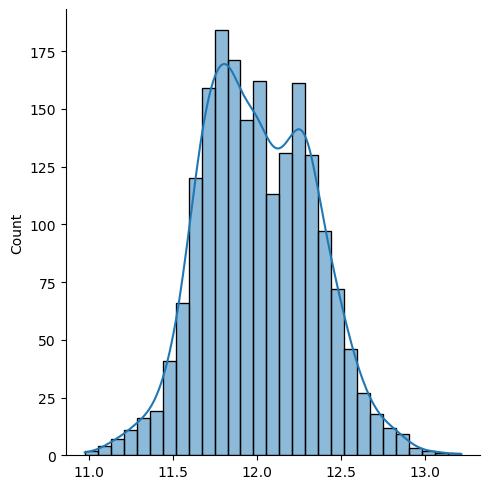

In [95]:
sns.displot(model_3.predict(train),kde = True)

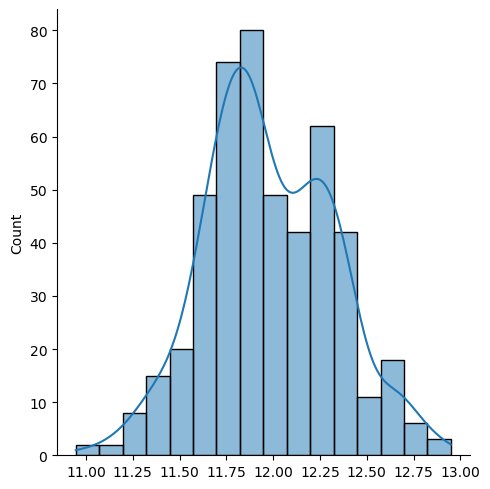

In [96]:
sns.displot(model_3.predict(test), kde = True)

In [97]:
model_3.predict(test)

385     12.552540
1906    12.201930
1052    11.899211
1365    11.785040
1091    11.415606
          ...    
151     11.666463
811     12.330341
2139    11.918717
669     11.973655
839     12.075742
Length: 483, dtype: float64

#### Adding the prdicted column after transformation

In [98]:
train['Sale_Price_Predicted'] = np.exp(model_3.predict(train))
test['Sale_Price_Predicted'] = np.exp(model_3.predict(test))

In [99]:
train.head()

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical,ln_Sale_Price,Sale_Price_Predicted
590,80.0,9000.0,160.0,1142.0,0.0,-93.605520,42.038811,113500.0,1958,1,...,0,0,0,0,0,0,0,1,11.639558,114249.271631
235,75.0,9375.0,1040.0,1044.0,1054.0,-93.680864,42.018721,240000.0,1997,2,...,0,0,0,0,0,0,0,1,12.388394,223556.906091
1287,0.0,4426.0,848.0,848.0,0.0,-93.683127,42.015927,149300.0,2004,1,...,0,0,0,0,0,0,0,1,11.913713,140378.940497
2345,45.0,8248.0,686.0,686.0,564.0,-93.656753,42.022089,116000.0,1918,1,...,1,0,0,0,0,0,0,1,11.661345,115907.830883
1290,0.0,4438.0,848.0,848.0,0.0,-93.681401,42.016122,144500.0,2004,1,...,0,0,0,0,0,0,0,1,11.881035,140314.710721


In [100]:
test.head()

,Lot_Frontage,Lot_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Longitude,Latitude,Sale_Price,Year_Built,Full_Bath,...,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Exter_Cond_Fair,Exter_Cond_Good,Exter_Cond_Poor,Exter_Cond_Typical,ln_Sale_Price,Sale_Price_Predicted
385,107.0,11362.0,1836.0,1836.0,0.0,-93.652724,42.060178,280000.0,2004,2,...,0,0,0,0,0,0,0,1,12.542545,282812.533900
1906,0.0,9928.0,1454.0,1478.0,0.0,-93.602505,41.995931,210000.0,1991,2,...,0,0,0,0,0,0,0,1,12.254863,199173.102829
1052,72.0,10007.0,1053.0,1053.0,0.0,-93.623267,42.041020,145500.0,1959,1,...,1,0,0,0,0,0,0,1,11.887931,147150.541483
1365,73.0,9802.0,352.0,712.0,730.0,-93.649198,41.995142,172500.0,2006,2,...,0,0,0,0,0,0,0,1,12.058153,131273.722120
1091,60.0,10800.0,0.0,694.0,600.0,-93.612253,42.035222,106250.0,1900,2,...,1,0,0,0,0,0,0,1,11.573550,90726.590327


### Checking the Co-relations between Actual & Predicted Data

C:\Users\Yash Bhargava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


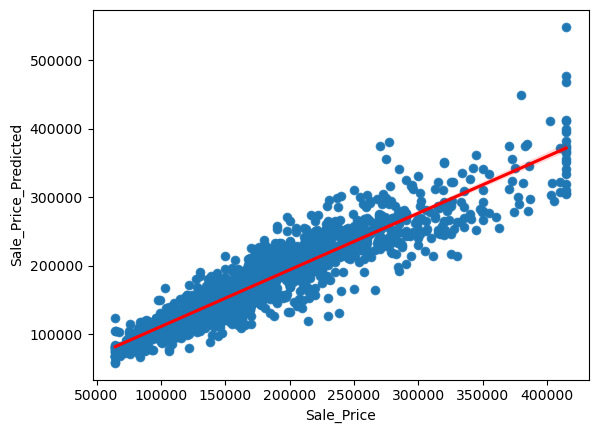

In [106]:
sns.scatterplot(train.Sale_Price,train.Sale_Price_Predicted)
sns.regplot(x = train.Sale_Price, y = train.Sale_Price_Predicted, line_kws = {'color': 'red'})
plt.show()

C:\Users\Yash Bhargava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale_Price', ylabel='Sale_Price_Predicted'>

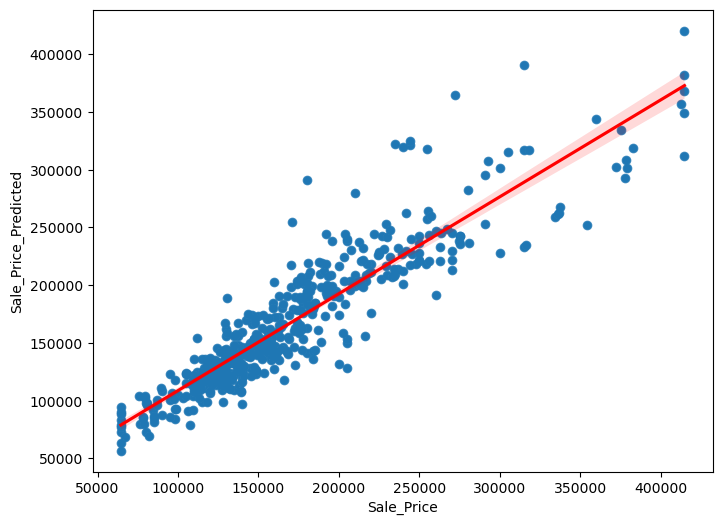

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(test.Sale_Price,test.Sale_Price_Predicted)
sns.regplot(x = test.Sale_Price, y = test.Sale_Price_Predicted, line_kws = {'color': 'red'})

### Calculating the accuracy measures for Linear Regression
        - MAE, MAPE, MSE, RMSE, R2_Score

In [103]:
train_mse = mean_squared_error(train.Sale_Price, train.Sale_Price_Predicted)
test_mse = mean_squared_error(test.Sale_Price, test.Sale_Price_Predicted)

train_rmse  = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(train.Sale_Price, train.Sale_Price_Predicted)
test_mae = mean_absolute_error(test.Sale_Price, test.Sale_Price_Predicted)

train_mape = mean_absolute_percentage_error(train.Sale_Price, train.Sale_Price_Predicted)
test_mape = mean_absolute_percentage_error(test.Sale_Price, test.Sale_Price_Predicted)

train_R2_Score = r2_score(train.Sale_Price,train.Sale_Price_Predicted)
test_R2_Score = r2_score(test.Sale_Price,test.Sale_Price_Predicted)

print("Train MSE = ", train_mse, "| ", "Test MSE = ", test_mse)
print("Train MAE = ", train_mae, "| ", "Test MAE = ", test_mae)
print("Train MAPE = ", train_mape, "| ", "Test MAPE = ", test_mape)
print("Train RMSE = ", train_rmse, "| ", "Test RMSE = ", test_rmse)
print("Train R2_Score = ",train_R2_Score, "|", "Test R2_Score = ",test_R2_Score)

Train MSE =  706052127.6332823 |  Test MSE =  724446318.2811077
Train MAE =  18923.754012731526 |  Test MAE =  18756.92513555511
Train MAPE =  0.10671274007878859 |  Test MAPE =  0.106643009373497
Train RMSE =  26571.641417746145 |  Test RMSE =  26915.540460505483
Train R2_Score =  0.8436884970982405 | Test R2_Score =  0.8347677791616233


##### Here in the above output we get a R2_Score of 0.84 on training data and 0.83 on test data which means that our final model i.e. Model 3 is giving a good accuracy of 84% and 83% on both training and test set respectively.